<a href="https://colab.research.google.com/github/annlj/MLBootcamp21_Assignment/blob/main/MLBootcamp21_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ML Bootcamp 2021 - Week 2: Assignment

- In this week you will learn more about the Pandas library and implement Logistic Regression
- The comments will have most of the instructiions
- Attempt the questions using only python/pandas as much as possible as it is a very in-demand skill right now and learning it will be beneficial
- Use the Titanic Training dataset for all questions unless specified to use Test dataset

In [ ]:
#Import the necessary libraries here
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression, LogisticRegression # The Machine Learnig Algorithms
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # This can be used to scale your data
import matplotlib.pyplot as plt
import seaborn as sb

## Q1. What is the most frequently occuring age for male and female? If more than one particular age occurs equal number of times, report the higher of the two

In [ ]:
# Write your code below the comments in this cell
# Important
# Save your female age value in a variable called 'age_female'
# Save your male age value in a variable called 'age_male'

####Code Comes Here###
df = pd.read_csv("sample_data/train.csv")

grouped_f_age = df.groupby('Sex')['Age'].value_counts().female
grouped_m_age = df.groupby('Sex')['Age'].value_counts().male
grouped_f_age
grouped_m_age

###Code Comes Here###

###Answers come here###

age_female = 24.0
age_male = 28.0

###Answers come here###

## Q2. Convert the 'Sex' feature of the Train dataset into categorical feature. This question would require you to first read about categorical features and how they look before proceeding.

- Read about categorical data first: https://www.kdnuggets.com/2021/05/deal-with-categorical-data-machine-learning.html
- Create a new column called "Sex_Category"
- Use the lambda and apply function to perform this task

In [ ]:
# Write your code below the comments in this cell
# Important
# Finally your dataframe should have an additional column called "Sex_Category"
# This "Sex_Category" column should have the entry as 1 wherever the column "Sex" shows "female" and 0 wherever it shows "male"
# Do not remove the existing "Sex" column, instead create a new column based on this existing column
# I have already provided the code to create a new column for your dataframe called "df"
# Refer to the previous notebooks for reference

####Code Comes Here###
df['Sex_Category'] = df['Sex'].apply(lambda x: 0 if x == "male" else 1)
df
###Code Comes Here###

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


## Q3. Consider the "Age" and the "Fare" columns. These are known as Numerical features. Sometimes it is a good idea to scale these features(bring all the numerical features to one scale maybe between {0,1} or between {-1,1} so that the weights are not biased across the features

- Bring these two features to a common scale
- There are many techniques to do this and scikit-learn provides many built-in libraries. Try to explore them and see how you can apply them. You would need to import the appropriate libraries
- You can use anyone. Without using scikit-learn, the simplest scaler that you can implement manually is to make the mean 0 and standard deviation as 1
- In order to do this manual implementation all you need to do is take each value of "Age" and "Fare", subtract the mean(mean of full column) from each value and then divide that result by the standard devaition(standard deviation of full column)
- If you decide to use the manual process then take the mean of all values except the NULL/Missing values as otherwise you may get an error

In [ ]:
# Write your code below the comments in this cell
# Important
# Finally your dataframe should have two additional columns called "Age_Normalized" and "Fare_Normalized"
# Do not remove the existing "Age" or "Fare" column, instead create new columns based on these existing columns
# Refer to the previous notebooks for reference and also Q2 to understand how to add new columns to an existing dataframe
# Use the apply and lambda function to perform the calculations
# If you choose to use the scikit-learn libraries then make sure to import them first at the very top cell

####Code Comes Here###
missing_ages = df['Age'].isnull()
# determine mean age based on Sex
mean_ages = df.groupby('Sex')['Age'].mean()

def remove_na_ages(row):
   
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex']]
    else:
        return row['Age']

df['Age'] = df.apply(remove_na_ages, axis=1)

df["Age_Normalized"] = df['Age'].apply(lambda x: (x-df['Age'].mean())/df['Age'].std())

df["Fare_Normalized"] = df['Fare'].apply(lambda y: (y-df['Fare'].mean())/df['Fare'].std())

df
###Code Comes Here###

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Normalized,Fare_Normalized
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,-0.551057,-0.502163
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,0.653662,0.786404
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,-0.249877,-0.488580
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,0.427778,0.420494
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,0.427778,-0.486064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S,-0.174582,-0.386454
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S,-0.776942,-0.044356
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.75,1,2,W./C. 6607,23.4500,NaN,S,-0.569881,-0.176164
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,-0.249877,-0.044356


## Q4. Implement the ****Logistic**** function in Python based on the formula provided in the slides. All you need is provided in the numpy module or math module. There is a mistake, the place where I mention "Logit" function in the slides it is actually called "Logistic" function and not Logit function

In [ ]:
# Write your code below the comments in this cell
# Important
# Define a function and name it "logistic_fn"
# Return the final result of the logistic function
# The equation of the logistic function is present in the slides
####Code Comes Here###
def logistic_fn(x):
  final_result = 1/(1+np.exp(-x))
  return final_result
logistic_fn(1)
###Code Comes Here###

#Verification
# logistic_fn(1) --> 0.7310585786300049

0.7310585786300049

## Q5. Using the above newly generated features, "Age_Normalized", "Fare_Normalized", "Sex_Category" and ****any other feature of your choice****. Implement the Logistic Regression Function just as was described in the last class notebook

- Import the Logistic Regression Function from scikit-learn
- Select the appropriate features first from your dataframe
- Create appropriate variables called x_train, x_test, y_train, y_test using the splitting function showed before. Split the Training dataset itself into two parts: Training and Testing(also called Validation)
- Use all the features that you created now and REMEMBER, an ML model only accepts Numerical features. Now you will understand the importance of converting categorical data to numbers
- Then train/fit() your training data to the Logistic Regression Model and then test/predict() it on your test dataset
- ****The problem here is "Titanic Survival Prediction". From this name think about what is the output/label for this classification task. That single column will be your y_train/y_test. It was also accounced in class as well****

- Keep the "random_state" paramenter inside the Logistic Regression function as any number of your choice and and report that number when submitting the assignment so that I can recreate your results. That number can be any integer

- Print out the classification_report as shown during the class

Text(0, 0.5, 'Y')

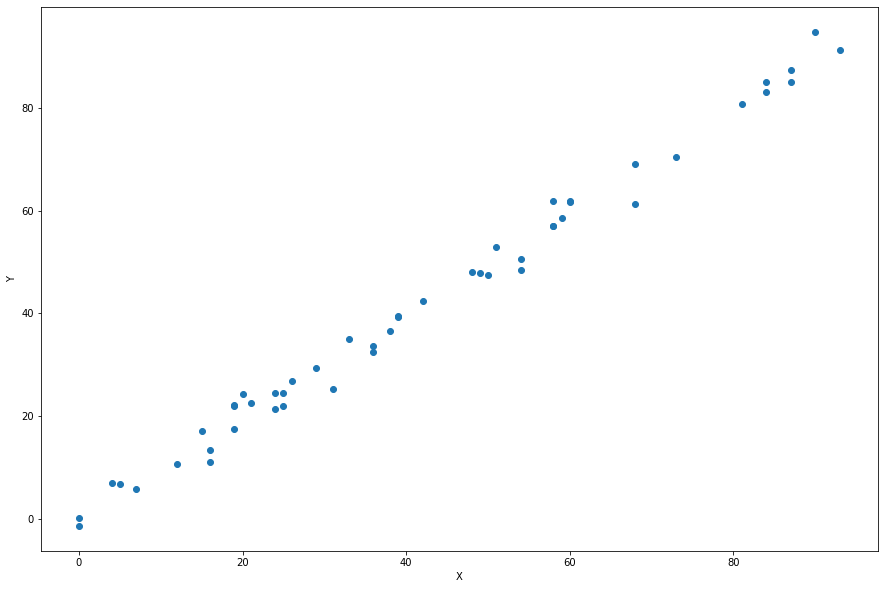

In [ ]:
import 
df_train = pd.read_csv("sample_data/train.csv")
df_train.dropna(inplace=True)
x_train = np.array(df_train['x'])
y_train = np.array(df_train['y'])
plt.figure(figsize=(15,10))
plt.scatter(x_train[:50],y_train[:50])
plt.xlabel("X")
plt.ylabel("Y")


Text(0, 0.5, 'Y')

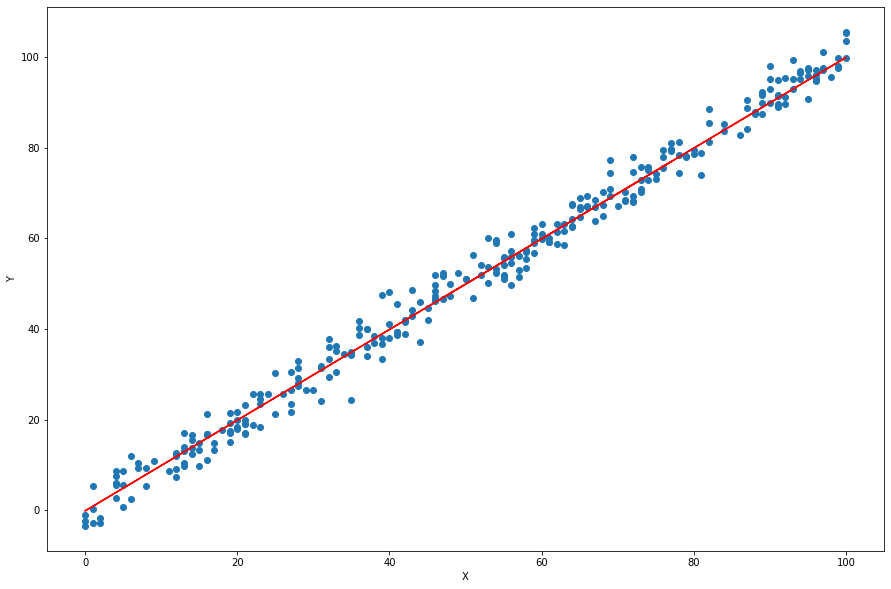

In [ ]:
reg = LinearRegression()
reg.fit(x_train.reshape(-1,1),y_train.reshape(-1,1))

df_test = pd.read_csv("sample_data/test.csv")
x_test = np.array(df_test['x'])
y_test = np.array(df_test['y'])
model_predictions  =reg.predict(x_test.reshape(-1,1))

plt.figure(figsize=(15,10))
plt.scatter(x_test,y_test)
plt.plot(x_test,model_predictions,color='r')
plt.xlabel("X")
plt.ylabel("Y")


In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df.loc[:,'Pclass':],df.Survived,\test_size=0.2)
log_reg = LogisticRegression()
log_reg.fit(x_train1,y_train1)
suvival_predictions = log_reg.predict(x_test1)
plt.figure(figsize=(15,10))
sb.scatterplot(data = x_test1, x = 'Age',y = 'Survived',hue=y_test1['Age_Normalized'])
#random_state
#classification_report

In [ ]:
plt.figure(figsize=(15,10))
sb.scatterplot(data = x_test1, x = 'Age',y = 'Survived',hue=survival_predictions)